# 12 판다스로 데이터를 분석해보자

12.1 엑셀보다 빠른 일처리는 판다스로   
12.2 CSV라고 들어봤니   
12.3 CSV에서 원하는 데이터를 뽑아 보자   
- LAB 12-1 울릉도는 몇 월에 바람이 가장 강할까? 

12.4 판다스의 데이터 구조 : 시리즈와 데이터프레임    
12.5 판다스로 데이터 파일을 읽기    
12.6 열을 기준으로 데이터 선택하기   
12.7 슬라이싱으로 행 선택하기   
12.8 데이터를 간편하게 분석할 수 있는 기능이 있다   
12.9 연도와 월, 일을 다루는 DatetimeIndex와 그룹핑   
12.10 데이터를 특정한 값에 기반하여 묶는 기능 : 그룹핑   
- LAB 12-2 울릉도는 몇 월에 바람이 가장 강할까? - groupby() 활용

12.11 조건에 맞게 골라내자 : 필터링   
12.12 빠진 데이터를 깨끗하게 메워 보자   
12.13 데이터 구조를 변경해 보자   
- LAB 12-3 다양한 방법으로 concat 적용해 보기

12.14 데이터베이스 join 방식의 데이터 병합 - merge   
- LAB 12-4 다양한 방법으로 merge 적용해 보기

## 12.1 엑셀보다 빠른 일처리는 판다스로

- 엑셀Excel은 행과 열로 이루어진 표에 입력된 데이터를 처리하는데 탁월한 성능을 보이고 있다.
- 넘파이는 데이터의 속성을 표시하는 행이나 열의 레이블을 가지고 있지 않다는 한계가 있다. 
- 파이썬의 판다스pandas 패키지를 사용하면 이러한 문제를 해결할 수 있다.
- pandas(Pannel Data Analysis)

![336-1.JPG](336-1.JPG)

![판다스의특징.png](pandas.png)

- 판다스로 어떤 일을 할 수 있나 
    - 데이터 보기 및 검사 
        - 데이터를 확인하고 다양한 통계 요약을 할 수 있다.
        - mean(), corr(), count() ...
            
    - 필터, 정렬 및 그룹화 
        - 데이터를 정렬, 필터링을  
        - 기준에 따라 몇 개의 그룹으로 데이터를 분할

    - 데이터 정제 
        - 데이터의 누락 값을 확인할 수 있다. 
        - 특정한 값을 다른 값으로 대체할 수 있다.


## 12.2 CSV라고 들어봤니

- CSV는 테이블 형식의 데이터를 저장하고 이동하는 데 사용되는 구조화된 텍스트 파일 형식이다. 
- CSV는 쉼표로 구분한 변수comma separated variables의 약자이다.
- Microsoft Excel와 같은 스프레드 시트spread sheet 소프트웨어에 적합한 형식
- CSV 파일은 필드를 나타내는 열과 레코드를 나타내는 행으로 구성
- CSV 파일의 첫 번째 레코드에는 열 제목이 포함되어 있을 수 있다. 


In [6]:
import csv # 판다스가 아닌 파이썬 csv 모듈을 사용함

f = open('weather.csv', encoding='latin-1') # csv 파일을 열어서 f에 저장한다.
data = csv.reader(f)  # reader() 함수를 이용하여 읽는다.

for row in data:
    print(row)

['ÀÏ½Ã', 'Æò±Õ±â¿Â(¡ÆC)', 'ÃÖ´ë Ç³¼Ó(m/s)', 'Æò±Õ Ç³¼Ó(m/s)']
['2010-08-01', '28.7', '8.3', '3.4']
['2010-08-02', '25.2', '8.7', '3.8']
['2010-08-03', '22.1', '6.3', '2.9']
['2010-08-04', '25.3', '6.6', '4.2']
['2010-08-05', '27.2', '9.1', '5.6']
['2010-08-06', '26.8', '9.8', '8']
['2010-08-07', '27.5', '9.1', '5']
['2010-08-08', '26.6', '5.9', '4']
['2010-08-09', '26.9', '5.1', '3.1']
['2010-08-10', '25.6', '10.2', '5.5']
['2010-08-11', '24.6', '9.4', '4.8']
['2010-08-12', '23.7', '8.7', '2.6']
['2010-08-13', '24.3', '10.9', '4.6']
['2010-08-14', '25', '10.8', '4.4']
['2010-08-15', '24.5', '16.9', '10.3']
['2010-08-16', '26.2', '9.8', '3.2']
['2010-08-17', '23.9', '4.2', '1.6']
['2010-08-18', '23.4', '4.2', '2.1']
['2010-08-19', '24.3', '4', '1.9']
['2010-08-20', '25.4', '5', '3.2']
['2010-08-21', '27.8', '7.6', '4.2']
['2010-08-22', '28.3', '5.9', '2.5']
['2010-08-23', '28.9', '9.3', '6.2']
['2010-08-24', '27.5', '8.3', '3']
['2010-08-25', '24.7', '6.8', '1.9']
['2010-08-26', '25.8',

- 반복문을 사용하여 import한 데이터의 네번째 열의 원소값 중에서 최대 값을 구하자.


In [7]:
# 데이터를 읽는다
f = open('weather.csv', encoding='latin-1')
data = csv.reader(f)
header = next(data)

# 데이터를 리스트에 담는다
weather_list = []
for line in data:
    weather_list.append(line)

# 네번째 열의 데이터만 모아서 리스트를 만든다
avg_wind_speed = []
for line in weather_list:
    if line[-1]: avg_wind_speed.append(float(line[-1]))

print(max(avg_wind_speed))
# 최대값을 구한다.


14.9


In [9]:
!pip install pandas

**LAB12-1** 울릉도는 몇 월에 바람이 가장 강할까?

## 12.4 판다스의 데이터 구조 : 시리즈와 데이터프레임

- Series, DataFrame
- 행의 이름을 인덱스index, 열의 이름을 컬럼스columns라 부른다.


In [10]:
import pandas as pd

data_df = pd.read_csv('weather.csv', encoding='cp949')
data_df # 데이터프레임, dataframe

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4


In [11]:
data_df['일시'] # Series

0       2010-08-01
1       2010-08-02
2       2010-08-03
3       2010-08-04
4       2010-08-05
           ...    
3648    2020-07-27
3649    2020-07-28
3650    2020-07-29
3651    2020-07-30
3652    2020-07-31
Name: 일시, Length: 3653, dtype: object

- Series 만들기


In [12]:
name_series = pd.Series(['유관순', '김구', '안중근'])
age_series = pd.Series([21, 22, 19])
grade_series = pd.Series([4.4, 4.2, 4.3])
name_series

0    유관순
1     김구
2    안중근
dtype: object

- 데이터 프레임 만들기
    - from dict 

In [13]:
df = pd.DataFrame({'이름': name_series, 
                   '나이': age_series,
                   '학점': grade_series})
df

,이름,나이,학점
0,유관순,21,4.4
1,김구,22,4.2
2,안중근,19,4.3


## 12.5 판다스로 데이터 파일을 읽기

In [19]:
import pandas as pd

# 'countries.csv' 읽기
df = pd.read_csv("countries.csv", index_col = 0)

print(df)

   country      area     capital  population
KR   Korea     98480       Seoul    51780579
US     USA   9629091  Washington   331002825
JP   Japan    377835       Tokyo   125960000
CN   China   9596960     Beijing  1439323688
RU  Russia  17100000      Moscow   146748600


In [ ]:
# 인덱스 컬럼의 지정
df = 


## 12.6 열을 기준으로 데이터 선택하기

In [20]:
# 'population' 열 데이터 얻기

df['population'] # 시리즈

KR      51780579
US     331002825
JP     125960000
CN    1439323688
RU     146748600
Name: population, dtype: int64

In [17]:
# 여러 열 데이터 얻기
df[['area', 'population']] # 데이터 프레임

KeyError: "None of [Index(['area', 'population'], dtype='object')] are in the [columns]"

**데이터 시각화하기**


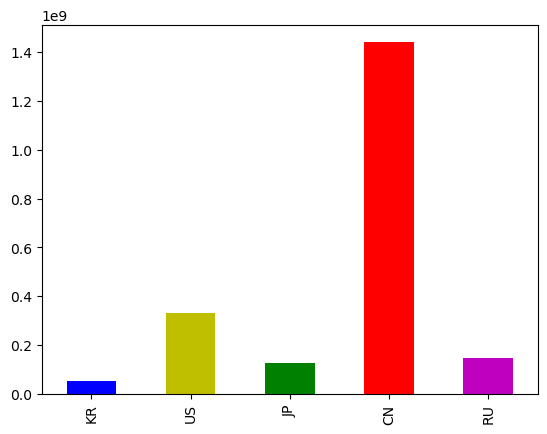

In [21]:
# 필요 패키지 
import matplotlib.pyplot as plt

df['population'].plot(kind='bar', color=['b', 'y', 'g', 'r', 'm'])
plt.show()

           일시  평균기온(°C)  최대 풍속(m/s)  평균 풍속(m/s)
0  2010-08-01      28.7         8.3         3.4
1  2010-08-02      25.2         8.7         3.8
2  2010-08-03      22.1         6.3         2.9
3  2010-08-04      25.3         6.6         4.2
4  2010-08-05      27.2         9.1         5.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          3653 non-null   object 
 1   평균기온(°C)    3653 non-null   float64
 2   최대 풍속(m/s)  3649 non-null   float64
 3   평균 풍속(m/s)  3647 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.3+ KB
None


Text(0.5, 0, 'wind speed (m/s)')

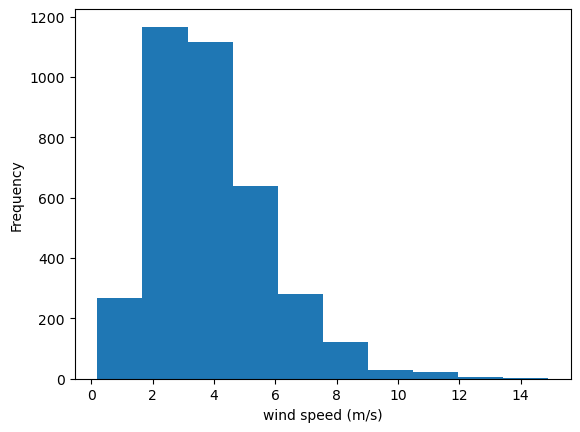

In [15]:
# weather 데이터를 읽어서 '평균풍속'의 히스토그램을 그려보자
# 필요한 패키지 

import pandas as pd
import matplotlib.pyplot as plt

# 데이터 읽기
weather_df = pd.read_csv('weather.csv', encoding = 'cp949')
weather_df.head()


# 데이터 확인하기
print(weather_df.head())
print(weather_df.info())

# '평균풍속'의 히스토그램을 그리기
weather_df['평균 풍속(m/s)'].plot(kind = 'hist')
plt.xlabel('wind speed (m/s)')

(array([2.670e+02, 1.167e+03, 1.115e+03, 6.400e+02, 2.800e+02, 1.210e+02,
        2.800e+01, 2.200e+01, 6.000e+00, 1.000e+00]),
 array([ 0.2 ,  1.67,  3.14,  4.61,  6.08,  7.55,  9.02, 10.49, 11.96,
        13.43, 14.9 ]),
 <BarContainer object of 10 artists>)

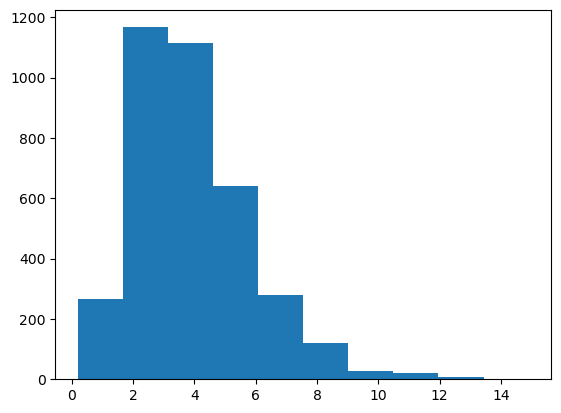

In [22]:
plt.hist(weather_df['평균 풍속(m/s)'])

In [23]:
weather_df.set_index('일시')

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
...,...,...,...
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0


## 12.7 슬라이싱으로 행 선택하기

In [24]:
countries_df = pd.read_csv('countries.csv', index_col = 0)
countries_df

,country,area,capital,population
KR,Korea,98480,Seoul,51780579
US,USA,9629091,Washington,331002825
JP,Japan,377835,Tokyo,125960000
CN,China,9596960,Beijing,1439323688
RU,Russia,17100000,Moscow,146748600


In [25]:
countries_df['area']

KR       98480
US     9629091
JP      377835
CN     9596960
RU    17100000
Name: area, dtype: int64

In [26]:
countries_df['capital'][1]

/var/folders/rz/x7zk5f352j72h3k2bcklkbx80000gn/T/ipykernel_72392/373988272.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  countries_df['capital'][1]


'Washington'

In [34]:
countries_df['capital'].iloc[1]

'Washington'

In [30]:
countries_df.iloc[:3]

,country,area,capital,population
KR,Korea,98480,Seoul,51780579
US,USA,9629091,Washington,331002825
JP,Japan,377835,Tokyo,125960000


In [33]:
countries_df.iloc[1:-1, 2:]

,capital,population
US,Washington,331002825
JP,Tokyo,125960000
CN,Beijing,1439323688


In [55]:
countries_df.iloc[-1]

country          Russia
area           17100000
capital          Moscow
population    146748600
Name: RU, dtype: object

In [56]:
countries_df.iloc[-1,2]

'Moscow'

In [49]:
# head()
countries_df.head(3)

,country,area,capital,population
KR,Korea,98480,Seoul,51780579
US,USA,9629091,Washington,331002825
JP,Japan,377835,Tokyo,125960000


In [50]:
# tail()
countries_df.tail(3)

,country,area,capital,population
JP,Japan,377835,Tokyo,125960000
CN,China,9596960,Beijing,1439323688
RU,Russia,17100000,Moscow,146748600


In [51]:
countries_df['area']

KR       98480
US     9629091
JP      377835
CN     9596960
RU    17100000
Name: area, dtype: int64

In [52]:
countries_df.loc['CN']

country            China
area             9596960
capital          Beijing
population    1439323688
Name: CN, dtype: object

In [28]:
countries_df.loc[['KR', 'RU'], ['area', 'capital']]

,area,capital
KR,98480,Seoul
RU,17100000,Moscow


In [53]:
countries_df.loc['CN', 'capital']

'Beijing'

In [ ]:
# 특정 행의 데이터 가져오기 - iloc
# indexing 


In [ ]:
# slicing

In [ ]:
# 특정 행의 데이터 가져오기 - loc


**새로운 열을 생성해 보자**


In [58]:
density = countries_df['population'] / countries_df['area']
countries_df['density'] = density
countries_df

,country,area,capital,population,density
KR,Korea,98480,Seoul,51780579,525.797918
US,USA,9629091,Washington,331002825,34.375293
JP,Japan,377835,Tokyo,125960000,333.373033
CN,China,9596960,Beijing,1439323688,149.977044
RU,Russia,17100000,Moscow,146748600,8.581789


In [62]:
# 면적당 인구수를 구해보자
density = countries_df['population'] / countries_df['area']
print(density)

# 새로운 열을 만들자
countries_df['density'] = density
print(countries_df)

KR    525.797918
US     34.375293
JP    333.373033
CN    149.977044
RU      8.581789
dtype: float64
   country      area     capital  population     density
KR   Korea     98480       Seoul    51780579  525.797918
US     USA   9629091  Washington   331002825   34.375293
JP   Japan    377835       Tokyo   125960000  333.373033
CN   China   9596960     Beijing  1439323688  149.977044
RU  Russia  17100000      Moscow   146748600    8.581789


## 12.8 데이터를 간편하게 분석할 수 있는 기능이 있다.

In [35]:
# 수치 데이터의 요약


countries_df = pd.read_csv('countries.csv', index_col = 0)
countries_df.describe()

,area,population
count,5.000000e+00,5.000000e+00
mean,7.360473e+06,4.189631e+08
std,7.185065e+06,5.795790e+08
min,9.848000e+04,5.178058e+07
25%,3.778350e+05,1.259600e+08
50%,9.596960e+06,1.467486e+08
75%,9.629091e+06,3.310028e+08
max,1.710000e+07,1.439324e+09


In [36]:
countries_df = pd.read_csv('countries.csv', encoding='cp949')
weather_df.describe()

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
count,3653.000000,3649.000000,3647.000000
mean,12.942102,7.911099,3.936441
std,8.538507,3.029862,1.888473
min,-9.000000,2.000000,0.200000
25%,5.400000,5.700000,2.500000
50%,13.800000,7.600000,3.600000
75%,20.100000,9.700000,5.000000
max,31.300000,26.000000,14.900000


In [39]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          3653 non-null   object 
 1   평균기온(°C)    3653 non-null   float64
 2   최대 풍속(m/s)  3649 non-null   float64
 3   평균 풍속(m/s)  3647 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.3+ KB


In [40]:
weather_df.head()

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


In [41]:
weather_df = weather_df.set_index('일시')
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3653 entries, 2010-08-01 to 2020-07-31
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   평균기온(°C)    3653 non-null   float64
 1   최대 풍속(m/s)  3649 non-null   float64
 2   평균 풍속(m/s)  3647 non-null   float64
dtypes: float64(3)
memory usage: 114.2+ KB


In [42]:
weather_df.head()

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [43]:
# 평균 - mean
weather_df.mean()

평균기온(°C)      12.942102
최대 풍속(m/s)     7.911099
평균 풍속(m/s)     3.936441
dtype: float64

In [44]:
# 표준편차 - std
weather_df.std()

평균기온(°C)      8.538507
최대 풍속(m/s)    3.029862
평균 풍속(m/s)    1.888473
dtype: float64

In [45]:
# 합 - sum
weather_df.sum()

평균기온(°C)      47277.5
최대 풍속(m/s)    28867.6
평균 풍속(m/s)    14356.2
dtype: float64

In [46]:
# 샘플의 수 - count
weather_df.count()

평균기온(°C)      3653
최대 풍속(m/s)    3649
평균 풍속(m/s)    3647
dtype: int64

In [ ]:
# 데이터의 일반적인 정보 보기


## 12.9 연도와 월, 일을 다루는 DatetimeIndex와 그룹핑

In [49]:
# 시간의 변환 : DatetimeIndex

weather_df.index

Index(['2010-08-01', '2010-08-02', '2010-08-03', '2010-08-04', '2010-08-05',
       '2010-08-06', '2010-08-07', '2010-08-08', '2010-08-09', '2010-08-10',
       ...
       '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
       '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31'],
      dtype='object', name='일시', length=3653)

In [54]:
# 인덱스를 DatetimeIndex로 바꾸기
date = pd.DatetimeIndex(weather_df.index)
date

DatetimeIndex(['2010-08-01', '2010-08-02', '2010-08-03', '2010-08-04',
               '2010-08-05', '2010-08-06', '2010-08-07', '2010-08-08',
               '2010-08-09', '2010-08-10',
               ...
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', name='일시', length=3653, freq=None)

In [55]:
date.month

Index([8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       ...
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
      dtype='int32', name='일시', length=3653)

In [56]:
date.day

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int32', name='일시', length=3653)

In [57]:
date.weekday

Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       ...
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4],
      dtype='int32', name='일시', length=3653)

In [59]:
# 월(month) 구하기: 'month' 컬럼 추가하기

weather_df['month'] = date.month
weather_df.head()

# weather_df['month'] = weather_df.index.month

weather_df

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s),month
일시,,,,
2010-08-01,28.7,8.3,3.4,8
2010-08-02,25.2,8.7,3.8,8
2010-08-03,22.1,6.3,2.9,8
2010-08-04,25.3,6.6,4.2,8
2010-08-05,27.2,9.1,5.6,8
...,...,...,...,...
2020-07-27,22.1,4.2,1.7,7
2020-07-28,21.9,4.5,1.6,7
2020-07-29,21.6,3.2,1.0,7


**동일한 것들 끼리 데이터 묶기 - groupby**

<BarContainer object of 12 artists>

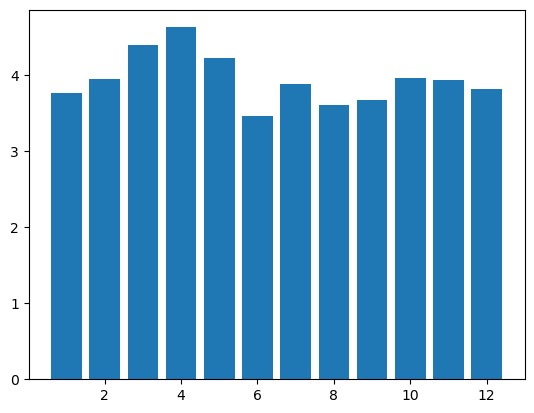

In [76]:
import matplotlib.pyplot as plt

mean_speed = []
for m in range(1,13):
    mean_speed.append (weather_df[weather_df['month'] == m]['평균 풍속(m/s)'].mean())

plt.bar(range(1,13), mean_speed)

<Axes: xlabel='month'>

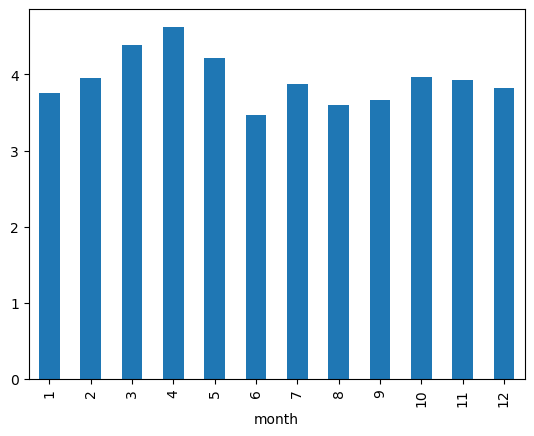

In [83]:
weather_df.groupby('month').mean()['평균 풍속(m/s)'].plot(kind = 'bar')

In [ ]:
# 붤 별 평균 구하기


**LAB12-1 울릉도는 몇 월에 바람이 가장 강할까?**
- 월별 평균 풍속을 그래프로 그리기

In [ ]:
# 직선 차트 그리기
means['평균 풍속(m/s)'].plot()
plt.show()

In [ ]:
# 막대 차트 그리기


## 12.11 조건에 맞게 골라내자

- 논리 인덱싱

In [ ]:
# 논리 익덱싱: 평균풍속이 10m/s 이상인가?

**빠진 값을 찾고 삭제하기**


In [85]:
# 결손값 확인 - isna()
weather_df.isna().sum() # na : not a number

평균기온(°C)      0
최대 풍속(m/s)    4
평균 풍속(m/s)    6
month         0
dtype: int64

In [86]:
weather_df[weather_df['평균 풍속(m/s)'].isna()]

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s),month
일시,,,,
2012-02-11,-0.7,NaN,NaN,2
2012-02-12,0.4,NaN,NaN,2
2012-02-13,4.0,NaN,NaN,2
2015-03-22,10.1,11.6,NaN,3
2015-04-01,7.3,12.1,NaN,4
2019-04-18,15.7,11.7,NaN,4


In [ ]:
# 결손값 데이터터 확인 


**빠진 값을 찾고 삭제하기**
- dropna(axis=0, how='any', inplace=False)

In [87]:
weather_df.dropna()

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s),month
일시,,,,
2010-08-01,28.7,8.3,3.4,8
2010-08-02,25.2,8.7,3.8,8
2010-08-03,22.1,6.3,2.9,8
2010-08-04,25.3,6.6,4.2,8
2010-08-05,27.2,9.1,5.6,8
...,...,...,...,...
2020-07-27,22.1,4.2,1.7,7
2020-07-28,21.9,4.5,1.6,7
2020-07-29,21.6,3.2,1.0,7


## 12.12 빠진 데이터를 깨끗하게 메워 보자
- fillna()

In [89]:
filled_df = weather_df.fillna('mean')

**데이터를 크기에 따라 나열하자 : sort_values**

In [91]:
weather_df['평균 풍속(m/s)'].sort_values(ascending = False)

일시
2015-08-25    14.9
2016-08-29    13.3
2019-10-12    12.7
2017-10-22    12.7
2011-09-03    12.5
              ... 
2012-02-12     NaN
2012-02-13     NaN
2015-03-22     NaN
2015-04-01     NaN
2019-04-18     NaN
Name: 평균 풍속(m/s), Length: 3653, dtype: float64

In [5]:
person_dic = {'Name' : '홍길동', 'AGE': 27, 'Clasee': '초급'}

print(person_dic['Name'])

홍길동
